In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from decpomdp import DecPOMDP
from problem import PROBLEM
import gc 
import copy
gc.enable()

In [2]:
# set game to run and initialize 


problem_name = "recycling"
planning_horizon = 10
gametype = "stackelberg"
sota = False
num_iterations = 3

decpomdp = DecPOMDP(problem_name,horizon=planning_horizon)
PROBLEM.initialize(decpomdp)
from beliefSpace import BeliefSpace
from pbvi import PBVI



In [3]:
belief_space= BeliefSpace(planning_horizon,0.02)
belief_space.monte_carlo_expansion()
# belief_space.add_samples(40)
print(belief_space.time_index_table)
belief_space.reset()
belief_space.expansion()
print(belief_space.time_index_table)

belief_space.size_at_horizon(2)

	Monte-Carlo belief expansion done with density = 0.02 , resulting belief space size = 25

{0: {0}, 1: {0, 1, 2, 3, 7, 8, 12, 13, 19}, 2: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}, 3: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}, 4: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}, 5: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}, 6: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}, 7: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}, 8: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}, 9: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}, 10: set()}
	belief expansion to horizon 10 done with density = 0.02 , resulting belief space size = 26

{

26

In [4]:
prob = PROBLEM.get_instance()
print(decpomdp.states)
print(decpomdp.joint_actions)
action = 1
state = 0
prob.REWARDS["generalsum"]

['s0', 's1', 's2', 's3']
[('searchbig', 'searchbig'), ('searchbig', 'searchlittle'), ('searchbig', 'waitandrecharge'), ('searchlittle', 'searchbig'), ('searchlittle', 'searchlittle'), ('searchlittle', 'waitandrecharge'), ('waitandrecharge', 'searchbig'), ('waitandrecharge', 'searchlittle'), ('waitandrecharge', 'waitandrecharge')]


[array([[ 0.  ,  0.  ,  0.  ,  0.  ],
        [ 2.  , -0.4 ,  2.  , -0.4 ],
        [ 0.  , -3.  ,  0.  , -3.  ],
        [ 2.  ,  2.  , -0.4 , -0.4 ],
        [ 4.  ,  1.2 ,  1.2 , -1.44],
        [ 2.  , -1.6 , -0.4 , -3.88],
        [ 0.  ,  0.  , -3.  , -3.  ],
        [ 2.  , -0.4 , -1.6 , -3.88],
        [ 5.  ,  0.5 ,  0.5 , -3.55]]),
 array([[-2., -3.,  1.,  0.],
        [ 0., -1., -2.,  5.],
        [-2.,  3., -3., -3.],
        [-2.,  0.,  0.,  5.],
        [-3.,  5.,  0.,  5.],
        [ 3.,  0.,  4.,  1.],
        [-3., -1.,  3.,  2.],
        [ 1., -1.,  0.,  2.],
        [-2., -2.,  3., -2.]])]

In [5]:
[np.array([[-2,-1],
  [-10,-10],
  [-11,-11],
  [5,-15]
  ]),
 np.array([[-1,-1],
  [-10,-10],
  [0,0],
  [15,-5]
  ])
]

[array([[ -2,  -1],
        [-10, -10],
        [-11, -11],
        [  5, -15]]),
 array([[ -1,  -1],
        [-10, -10],
        [  0,   0],
        [ 15,  -5]])]

In [6]:
[np.array([[-1,-1,-1,-2],
  [0,0,1,1],
  [-1,0,-1,0],
  [0,0,0,0]
  ]),
 np.array([[-1,-1,-1,-2],
  [-1,-1,0, 0,],
  [0,1,0,1],
  [0,0,0,0]
  ])
]

[array([[-1, -1, -1, -2],
        [ 0,  0,  1,  1],
        [-1,  0, -1,  0],
        [ 0,  0,  0,  0]]),
 array([[-1, -1, -1, -2],
        [-1, -1,  0,  0],
        [ 0,  1,  0,  1],
        [ 0,  0,  0,  0]])]

In [7]:
from experiment import Experiment
experiment = Experiment(planning_horizon,num_iterations)
# experiment.run_single_experiment(planning_horizon,gametype="stackelberg",sota=False)


	Monte-Carlo belief expansion done with density = 0.2 , resulting belief space size = 16

Added samples to the beleif space, with density =0.04 , new belief space size = 26 with 10 new belief points
0 : {0} 
1 : {1, 2, 3, 4, 7, 8, 11, 15} 
2 : {0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 23, 24} 
3 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25} 
4 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25} 
5 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25} 
6 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25} 
7 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25} 
8 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25} 
9 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25} 
Add

,horizon,gametype,SOTA,iterations,time,number_of_beliefs,leader values,follower values,density
0,1,cooperative,Stackelberg,1,0.026595,9,5.000000,"[5.0, 0.5, 0.49999999999999994, -2.99999999999...",0.200
1,1,cooperative,State of the Art,1,0.000211,9,5.000000,"[5.0, 0.5, 0.49999999999999994, -2.99999999999...",0.200
2,1,cooperative,Stackelberg,2,0.025230,9,5.000000,"[5.0, 0.5, 0.49999999999999994, -2.99999999999...",0.040
3,1,cooperative,State of the Art,2,0.000200,9,5.000000,"[5.0, 0.5, 0.49999999999999994, -2.99999999999...",0.040
4,1,cooperative,Stackelberg,3,0.018735,9,5.000000,"[5.0, 0.5, 0.49999999999999994, -2.99999999999...",0.008
...,...,...,...,...,...,...,...,...,...
175,10,generalsum,State of the Art,1,5.236062,16,11.130944,"[21.03318921712302, 3.0, 1.0, 5.0]",0.200
176,10,generalsum,Stackelberg,2,8.096280,26,9.383531,"[22.46845536399186, -0.7983908646800504, 3.033...",0.040
177,10,generalsum,State of the Art,2,8.091199,26,9.383531,"[22.46845536399186, -0.7983908646800504, 3.033...",0.040
178,10,generalsum,Stackelberg,3,8.225460,26,9.383531,"[22.46845536399186, -0.7983908646800504, 3.033...",0.008


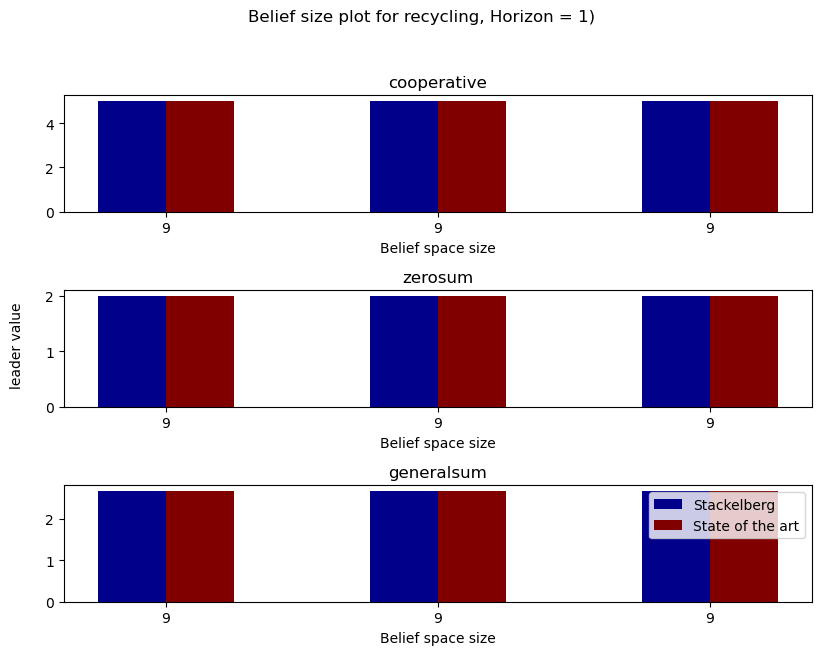

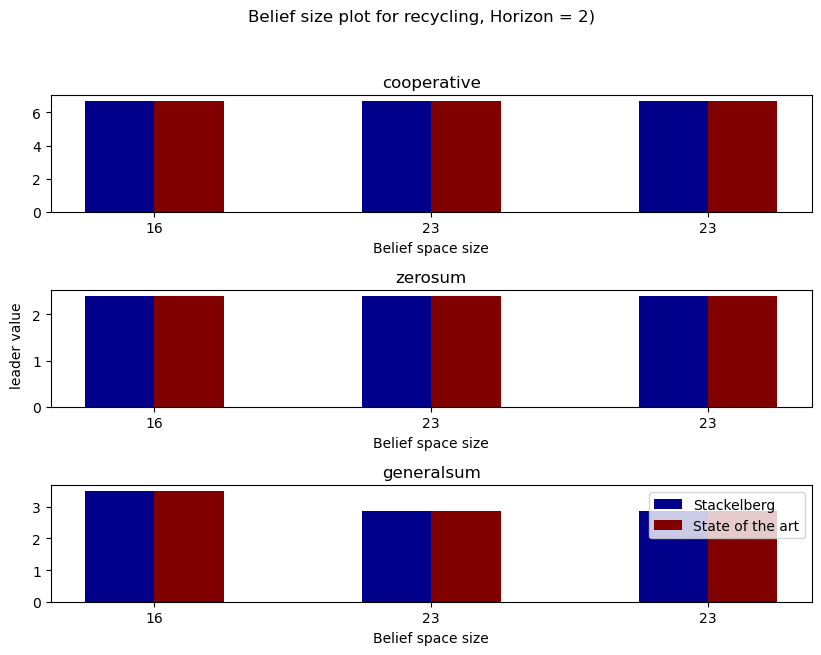

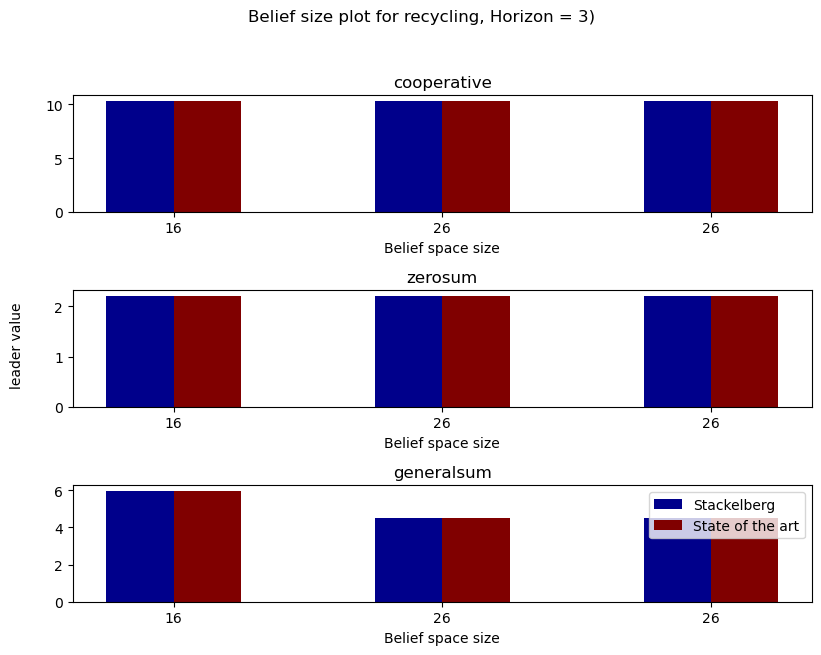

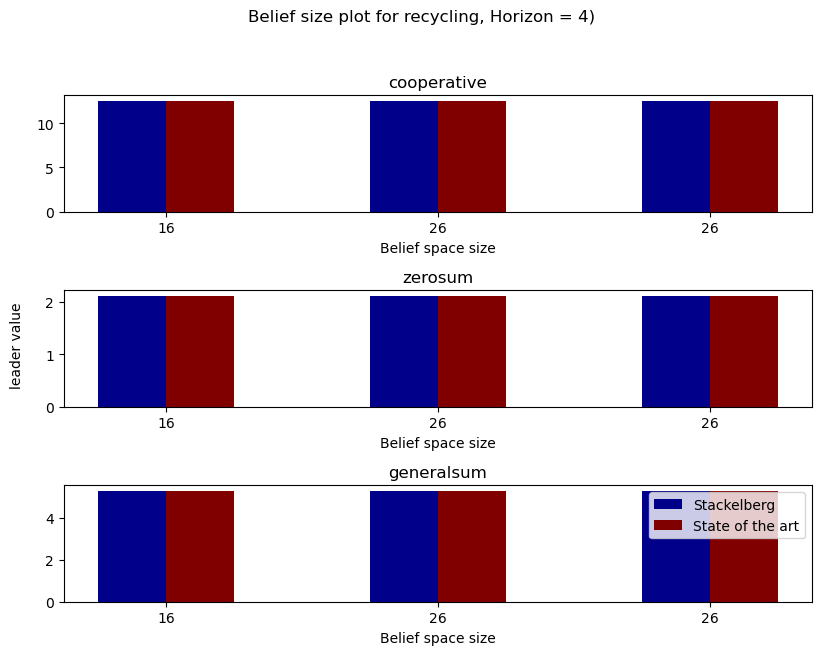

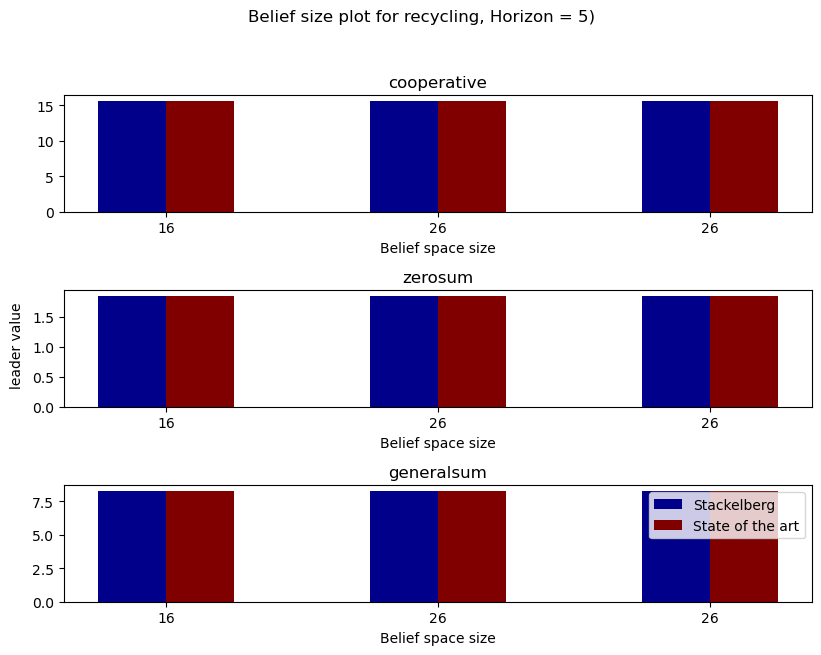

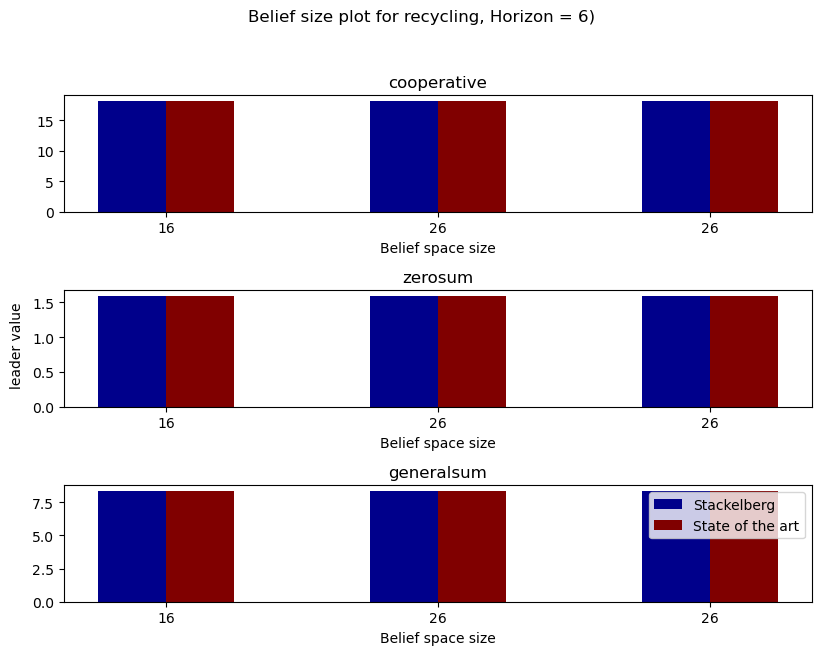

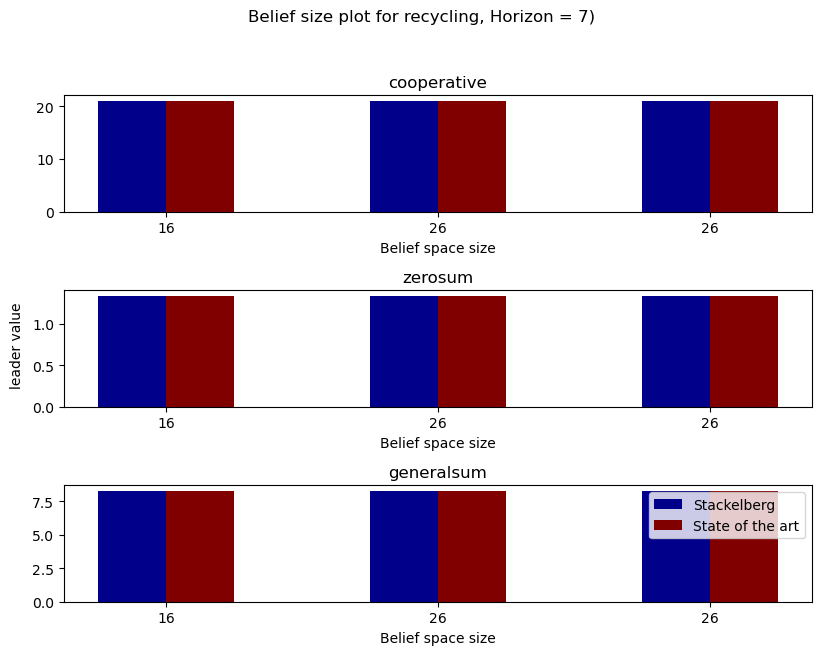

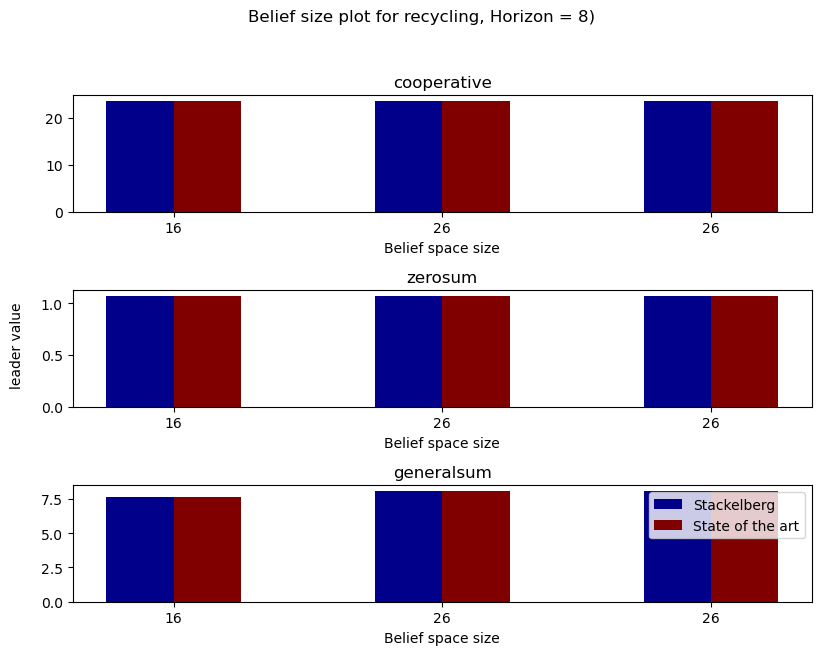

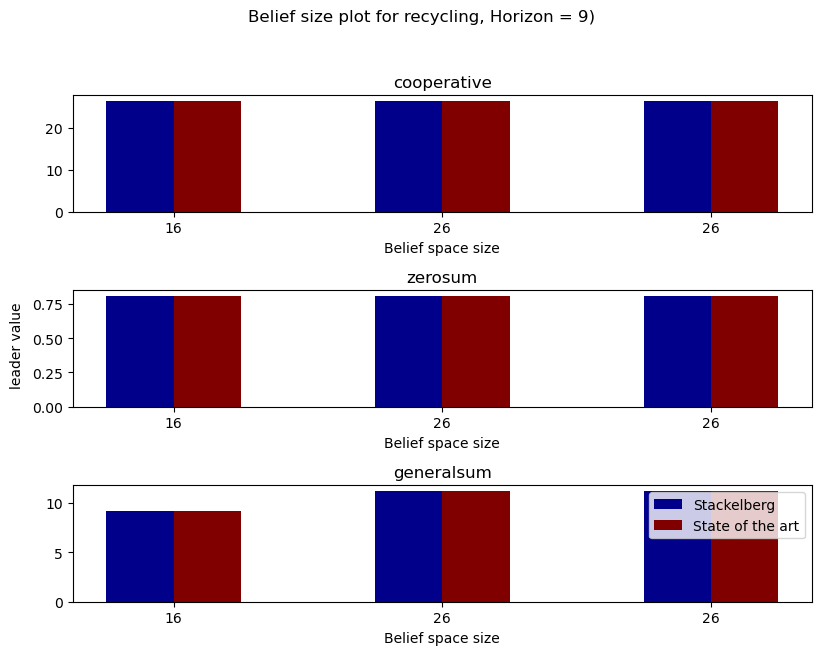

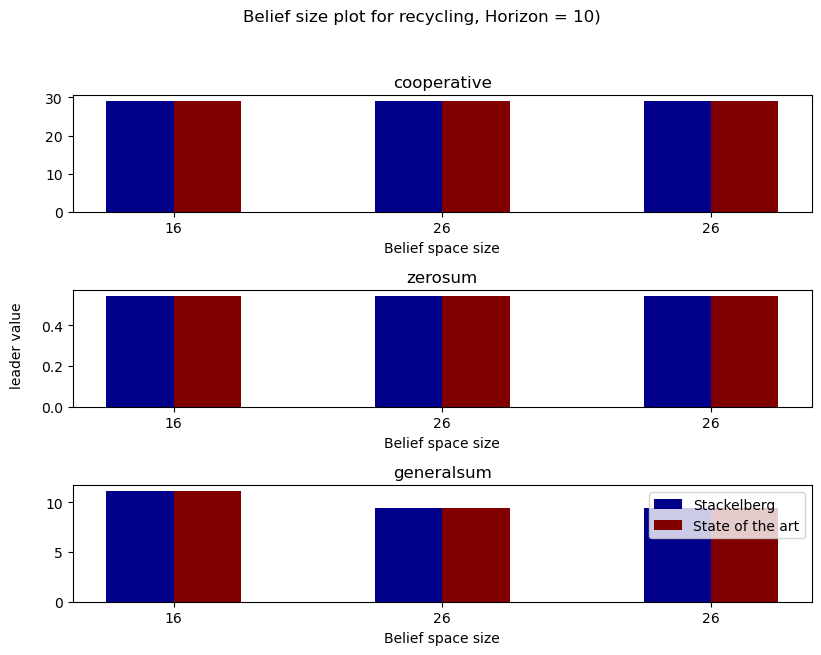

In [8]:
# run experiments 
experiment.run_experiments_decreasing_density(0.2)

In [9]:
for key,belief in experiment.game.value_function.belief_space.belief_dictionary.items():
    print(key,belief.value)

0 [1. 0. 0. 0.]
1 [1. 0. 0. 0.]
2 [0.49 0.21 0.21 0.09]
3 [0.35 0.15 0.35 0.15]
4 [0.5 0.5 0.  0. ]
5 [0.2 0.8 0.  0. ]
6 [0.21 0.49 0.09 0.21]
7 [0.5 0.  0.5 0. ]
8 [0.7 0.  0.3 0. ]
9 [0.3 0.  0.7 0. ]
10 [0.14 0.06 0.56 0.24]
11 [0.7 0.3 0.  0. ]
12 [0.1 0.4 0.1 0.4]
13 [0.15 0.15 0.35 0.35]
14 [0.06 0.14 0.24 0.56]
15 [0.35 0.35 0.15 0.15]
16 [0.2 0.  0.8 0. ]
17 [0.1 0.1 0.4 0.4]
18 [0.06 0.24 0.14 0.56]
19 [0.3 0.7 0.  0. ]
20 [0.25 0.25 0.25 0.25]
21 [0.09 0.21 0.21 0.49]
22 [0.21 0.09 0.49 0.21]
23 [0.14 0.56 0.06 0.24]
24 [0.15 0.35 0.15 0.35]
25 [0.04 0.16 0.16 0.64]


In [10]:
data = pd.DataFrame(experiment.database)
data[(data["gametype"]=="generalsum") & (data["horizon"]==1)]

,horizon,gametype,SOTA,iterations,time,number_of_beliefs,leader values,follower values,density
12,1,generalsum,Stackelberg,1,0.015947,9,2.666667,"[-0.33333333333333326, 0.9999999999999998, 3.3...",0.200
13,1,generalsum,State of the Art,1,0.018238,9,2.666667,"[-0.33333333333333326, 0.9999999999999998, 3.3...",0.200
14,1,generalsum,Stackelberg,2,0.018333,9,2.666667,"[-0.33333333333333326, 0.9999999999999998, 3.3...",0.040
15,1,generalsum,State of the Art,2,0.016411,9,2.666667,"[-0.33333333333333326, 0.9999999999999998, 3.3...",0.040
16,1,generalsum,Stackelberg,3,0.019444,9,2.666667,"[-0.33333333333333326, 0.9999999999999998, 3.3...",0.008
17,1,generalsum,State of the Art,3,0.017566,9,2.666667,"[-0.33333333333333326, 0.9999999999999998, 3.3...",0.008


In [11]:
experiment.comparison_matrix


,Strong Leader Policy,Weak Leader Policy
Strong Follower Policy,"(9.383530623828248, 22.46845536399186)","[7.760168918441641, 10.730265718205114]"
Blind Follower Policy,"[7.760168918441641, 10.730265718205114]","(9.383530623828248, 22.46845536399186)"


In [12]:
tables = experiment.generate_summary_table()
tables

State of the Art                                           \
                          time leader value iteration number_of_beliefs   
recycling(1)          0.018238     2.666667         3                 9   
recycling(2)          0.195609     3.496996         3                23   
recycling(3)          0.658776     5.962843         3                26   
recycling(4)          0.957318     5.294313         3                26   
recycling(5)          1.947193     8.266975         3                26   
recycling(6)          1.995214     8.352884         3                26   
recycling(7)          3.153525     8.257454         3                26   
recycling(8)          3.290309     7.665426         3                26   
recycling(9)          4.236455     9.183609         3                26   
recycling(10)         5.236062    11.130944         3                26   

              Stackelberg                                           
                     time leader value iteration number_of_beliefs  
recycling(1)     0.015947     2.666667         3                 9  
recycling(2)     0.180410     3.496996         3                23  
recycling(3)     0.672028     5.962843         3                26  
recycling(4)     1.144706     5.294313         3                26  
recycling(5)     1.758132     8.266975         3                26  
recycling(6)     2.319972     8.352884         3                26  
recycling(7)     3.608468     8.257454         3                26  
recycling(8)     3.261097     7.665426         3                26  
recycling(9)     4.440871     9.183609         3                26  
recycling(10)    5.084646    11.130944         3                26

In [13]:
experiment.generate_comparison_tables()
# current_data = experiment.database[(experiment.database["SOTA"]=="Stackelberg")&(experiment.database["horizon"]==2)&(experiment.database["gametype"]=="generalsum")]
# current_data

cooperative                           \
  State of the Art Leader Value Stackelberg Leader Value   
0                      5.000000                 5.000000   
1                      6.700000                 6.700000   
2                     10.325000                10.325000   
3                     12.506100                12.506100   
4                     15.630500                15.630500   
5                     18.137625                18.137625   
6                     20.989306                20.989306   
7                     23.636582                23.636582   
8                     26.404514                26.404514   
9                     29.096347                29.096347   

                        zerosum                           \
  State of the Art Leader Value Stackelberg Leader Value   
0                      2.000000                 2.000000   
1                      2.398244                 2.398244   
2                      2.209860                 2.209860   
3                      2.107978                 2.107978   
4                      1.848550                 1.848550   
5                      1.589653                 1.589653   
6                      1.337636                 1.337636   
7                      1.070138                 1.070138   
8                      0.806052                 0.806052   
9                      0.542079                 0.542079   

                     generalsum                           
  State of the Art Leader Value Stackelberg Leader Value  
0                      2.666667                 2.666667  
1                      3.496996                 3.496996  
2                      5.962843                 5.962843  
3                      5.294313                 5.294313  
4                      8.266975                 8.266975  
5                      8.352884                 8.352884  
6                      8.257454                 8.257454  
7                      7.665426                 7.665426  
8                      9.183609                 9.183609  
9                     11.130944                11.130944

In [14]:
data = experiment.database[(experiment.database["SOTA"]==True)&(experiment.database["horizon"]==1)&(experiment.database["gametype"]==gametype)]
data

,horizon,gametype,SOTA,iterations,time,number_of_beliefs,leader values,follower values,density


In [15]:
experiment.generate_summary_table()

State of the Art                                           \
                          time leader value iteration number_of_beliefs   
recycling(1)          0.018238     2.666667         3                 9   
recycling(2)          0.195609     3.496996         3                23   
recycling(3)          0.658776     5.962843         3                26   
recycling(4)          0.957318     5.294313         3                26   
recycling(5)          1.947193     8.266975         3                26   
recycling(6)          1.995214     8.352884         3                26   
recycling(7)          3.153525     8.257454         3                26   
recycling(8)          3.290309     7.665426         3                26   
recycling(9)          4.236455     9.183609         3                26   
recycling(10)         5.236062    11.130944         3                26   

              Stackelberg                                           
                     time leader value iteration number_of_beliefs  
recycling(1)     0.015947     2.666667         3                 9  
recycling(2)     0.180410     3.496996         3                23  
recycling(3)     0.672028     5.962843         3                26  
recycling(4)     1.144706     5.294313         3                26  
recycling(5)     1.758132     8.266975         3                26  
recycling(6)     2.319972     8.352884         3                26  
recycling(7)     3.608468     8.257454         3                26  
recycling(8)     3.261097     7.665426         3                26  
recycling(9)     4.440871     9.183609         3                26  
recycling(10)    5.084646    11.130944         3                26

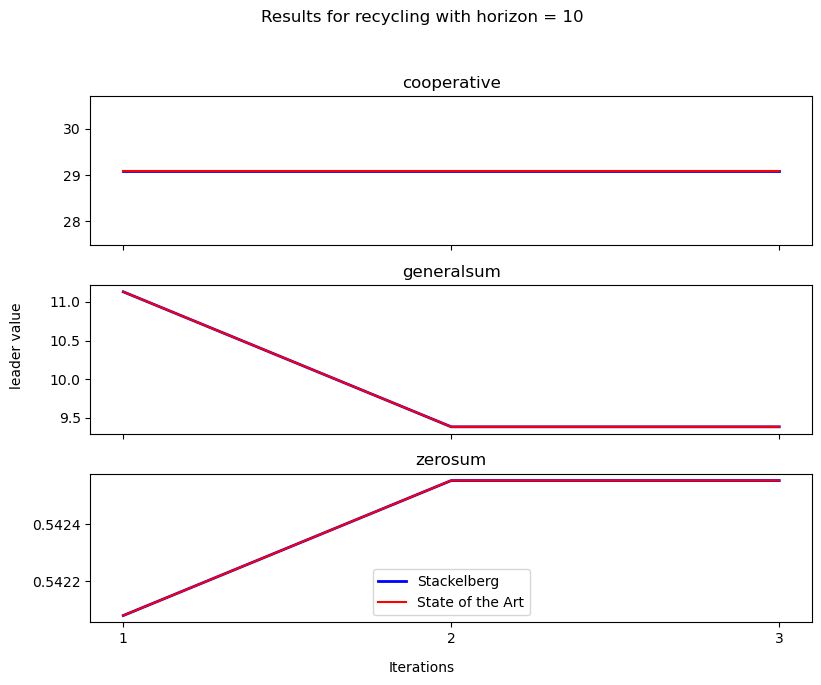

In [16]:
experiment.plots()

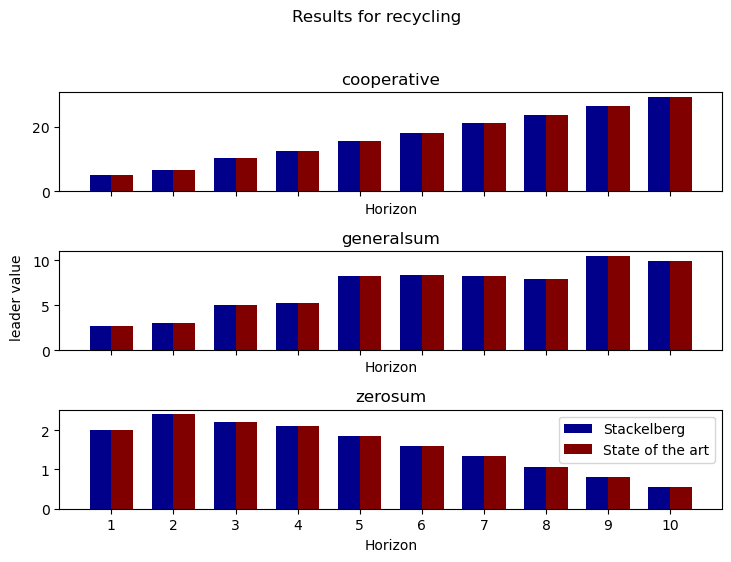

In [17]:
experiment.horizon_value_plot(densities=True)

belief size : [16, 26, 26],
 sota values = [29.096347330131458, 29.096347330131458, 29.096347330131458],
 non-sota-values = [29.096347330131458, 29.096347330131458, 29.096347330131458]  
belief size : [16, 26, 26],
 sota values = [11.13094352463854, 9.383530623828248, 9.383530623828248],
 non-sota-values = [11.13094352463854, 9.383530623828248, 9.383530623828248]  
belief size : [16, 26, 26],
 sota values = [0.542079410996943, 0.5425540917097693, 0.5425540917097693],
 non-sota-values = [0.5420794109969433, 0.5425539635818315, 0.5425539635818315]  


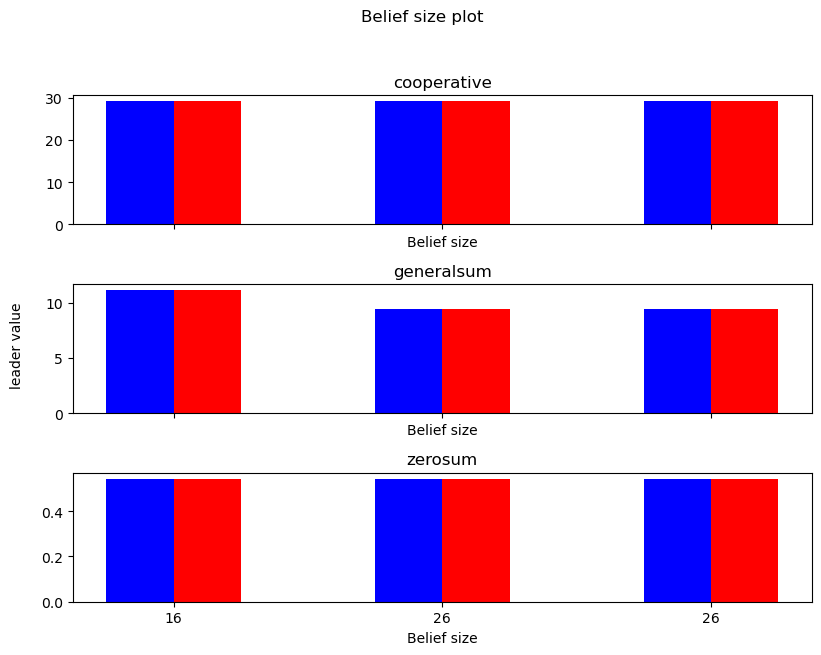

In [18]:
# experiment.density_plot()
data = experiment.database[(experiment.database["gametype"]=="generalsum") & (experiment.database["horizon"]==experiment.planning_horizon)]
data["number_of_beliefs"]

fig, axs = plt.subplots(3, 1, figsize=(9, 7), sharex=True)
colors = ['blue', 'red']
bar_width = 0.25
for idx,gametype in enumerate(["cooperative","generalsum","zerosum"]):
    data = experiment.database[(experiment.database["gametype"]==gametype) & (experiment.database["horizon"]==experiment.planning_horizon)]
    belief_sizes = [value for value in  data["number_of_beliefs"][data["SOTA"]=="State of the Art"]]
    sota_leader_values = [value for value in  data["leader values"][data["SOTA"]=="State of the Art"]]
    non_sota_leader_values = [value for value in  data["leader values"][data["SOTA"]=="Stackelberg"]]
    axs[idx].set_title(f"{gametype}") 


    print(f"belief size : {belief_sizes},\n sota values = {sota_leader_values},\n non-sota-values = {non_sota_leader_values}  ")
    x = np.arange(len(belief_sizes))  # Generating x-values for bars

    # Plotting
    axs[idx].bar(x - bar_width / 2, sota_leader_values, bar_width, label='Stackelberg', color=colors[0])
    axs[idx].bar(x + bar_width / 2, non_sota_leader_values, bar_width, label='State of the art', color=colors[1])

    # Setting x-axis ticks and labels
    axs[idx].set_xticks(x)
    axs[idx].set_xticklabels(belief_sizes)
    axs[idx].set_xlabel("Belief size")



fig.suptitle(f"Belief size plot")
fig.text(0.05, 0.5, 'leader value', ha='center', va='center', rotation='vertical')

plt.tight_layout(rect=[0.05, 0.05, 0.95, 0.95])  # Adjust the rect parameter as needed
plt.show()

# experiment.generate_comparison_tables()

In [19]:
experiment.generate_summary_table()

State of the Art                                           \
                          time leader value iteration number_of_beliefs   
recycling(1)          0.018238     2.666667         3                 9   
recycling(2)          0.195609     3.496996         3                23   
recycling(3)          0.658776     5.962843         3                26   
recycling(4)          0.957318     5.294313         3                26   
recycling(5)          1.947193     8.266975         3                26   
recycling(6)          1.995214     8.352884         3                26   
recycling(7)          3.153525     8.257454         3                26   
recycling(8)          3.290309     7.665426         3                26   
recycling(9)          4.236455     9.183609         3                26   
recycling(10)         5.236062    11.130944         3                26   

              Stackelberg                                           
                     time leader value iteration number_of_beliefs  
recycling(1)     0.015947     2.666667         3                 9  
recycling(2)     0.180410     3.496996         3                23  
recycling(3)     0.672028     5.962843         3                26  
recycling(4)     1.144706     5.294313         3                26  
recycling(5)     1.758132     8.266975         3                26  
recycling(6)     2.319972     8.352884         3                26  
recycling(7)     3.608468     8.257454         3                26  
recycling(8)     3.261097     7.665426         3                26  
recycling(9)     4.440871     9.183609         3                26  
recycling(10)    5.084646    11.130944         3                26

belief size: [16 26 26],
 sota values: [29.09634733 29.09634733 29.09634733],
 non-sota values: [29.09634733 29.09634733 29.09634733]
belief size: [16 26 26],
 sota values: [0.54207941 0.54255409 0.54255409],
 non-sota values: [0.54207941 0.54255396 0.54255396]
belief size: [16 26 26],
 sota values: [11.13094352  9.38353062  9.38353062],
 non-sota values: [11.13094352  9.38353062  9.38353062]


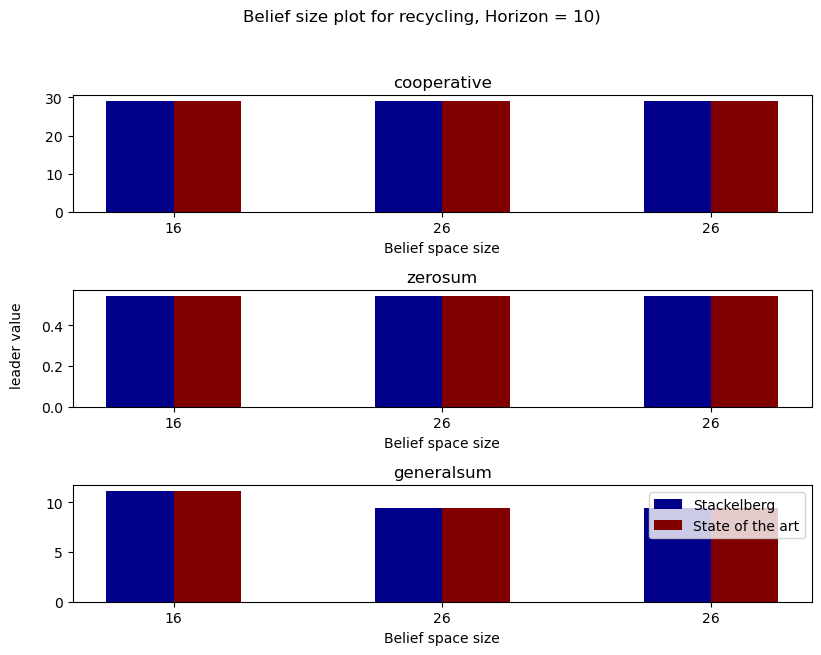

In [20]:
experiment.density_plot()

In [21]:
class ClassA:
    def __init__(self, shared_data):
        self.shared_data = shared_data

    def update_shared_data(self, key, value):
        self.shared_data.add_samples(20)


class ClassB:
    def __init__(self, shared_data):
        self.shared_data = shared_data

    def read_shared_data(self):
        print(f"ClassB reads shared data: {self.shared_data.time_index_table}")


# Create a shared dictionary
shared_dict = BeliefSpace(3,0.2)

# Instantiate ClassA and ClassB with the shared dictionary
a = ClassA(shared_dict)
b = ClassB(shared_dict)

# Update shared data using ClassA
a.update_shared_data('key1', 'value1')

# Read shared data using ClassB
b.read_shared_data()


Added samples to the beleif space, with density =0.2 , new belief space size = 12 with 11 new belief points
0 : {0} 
1 : {0, 1, 2, 3, 5, 6, 7, 8, 9} 
2 : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11} 
ClassB reads shared data: {0: {0}, 1: {0, 1, 2, 3, 5, 6, 7, 8, 9}, 2: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}, 3: set()}
